In [1]:

from IPython.display import display
import json
import pandas as pd
import os
from pathlib import Path


dirname = os.path.dirname(os.getcwd())
cluster_folders = ["GpResults\\CANNOTMOVERESULTS", "GpResults\\CANMOVERESULTS"]
cluster_folders = [os.path.join(dirname, folder) for folder in cluster_folders]


def get_df(file):
    with open(file) as f:
        results = json.load(f)
        return pd.json_normalize(results)

def get_gp_result_files():
    for folder in cluster_folders:
        return [str(f) for f in Path(folder).rglob('gpResults*.json')]



In [2]:

files = get_gp_result_files()
data = [get_df(f) for f in files]


In [3]:
def get_guids_in_each_generation_across_runs(dfs):
    num_generations = len(dfs[0].generations[0])
    for i in range(len(dfs)):
        df = dfs[i]
        df_gens = len(df.generations[0])
        if df_gens != num_generations:
            raise Exception(f"Number of generations for df {i} is {df_gens}, not {num_generations}!")

    guids_across_generations_and_runs = []
    for i in range(num_generations):
        ith_generations = [(pd.DataFrame(df.generations[0])).iloc[i] for df in dfs]
        merged = []
        for gen in ith_generations:
            pop = pd.DataFrame(gen.population)
            guids = [guid for guid in pop.guid]
            merged.extend(guids)
            #print(ind)
        guids_across_generations_and_runs.append(merged)
    return guids_across_generations_and_runs

In [4]:
guids_across_gens_and_runs = get_guids_in_each_generation_across_runs(data)
display(guids_across_gens_and_runs[0])

['995f5e3d-36cf-4eda-b7e6-c7524ed58a20',
 '17b366fe-8b15-4b2e-a738-e460a79d0cee',
 'd1f3c729-f30f-466f-a552-9022cd476de3',
 '5145bb8e-1396-47ee-82f7-9e854cb4ab88',
 'e7c8b0a4-e8cf-4044-b984-e6e277e7c100',
 '43096f92-f6c4-4f46-a47a-c965c23a667f',
 '029cdb91-687e-4261-a359-0a3c16176b06',
 'a9047259-fc1d-4671-b129-5c1294d5e59d',
 '1987f371-c333-48be-a75b-eee3c18d0f64',
 'a322aff5-1ce9-4362-9310-f9de973f470c',
 'eff5244b-b2b4-41b5-aff6-9fde7f605d83',
 '8d9ba8d7-bdf9-4efb-a7cc-74b2376bd76b',
 '35f4a397-080d-4761-ab0b-924335722e74',
 '6a178c6c-1ccc-4c7e-af40-91b6d36c4b19',
 '2d8ca9c8-ddc0-4fd0-9621-d42d436a10f9',
 'e8f3bfee-7aeb-40d5-ae3a-eb1ee1c9755b',
 'a33601fc-3c22-44e8-ba17-3bda60b94dc6',
 '492f1205-3925-4656-9863-2e8328f1af2d',
 '55040ea5-210d-45a9-9409-cc056f77fe23',
 '504d549d-c9b9-4bf3-b5ec-5fdb2a2de71d',
 '47c5adcc-16a1-4bff-ae0a-2bd88bce33cc',
 'b2b3a99c-3091-42d3-b7d0-f7eb2891b050',
 '209871f8-75c9-414c-8ba2-4ca96d55c508',
 '88f94e15-c2eb-4bea-b0f5-bafe5878d4a7',
 '8f484a72-8e79-

In [5]:
unique_guids = set()
print(sum([len(l[0]) for l in guids_across_gens_and_runs]))
for gen in guids_across_gens_and_runs:
    for guid in gen:
        unique_guids.add(guid)

756


In [6]:
age_per_ind_per_gen = {}
num_gens = len(data[0].generations[0])
for gen in range(num_gens):
    # display(guids_across_gens_and_runs[gen])
    age_per_ind_for_this_gen = {}
    for guid in guids_across_gens_and_runs[gen]:
        if gen > 0 and guid in age_per_ind_per_gen[gen - 1]:
            age_per_ind_for_this_gen[guid] = age_per_ind_per_gen[gen - 1][guid] + 1
        else:
            age_per_ind_for_this_gen[guid] = 0
    age_per_ind_per_gen[gen] = age_per_ind_for_this_gen

elite_size = 5
num_runs = 16
for gen in range(num_gens):
    ages_for_gen = age_per_ind_per_gen[gen].values()

    any_too_old = any([age > gen for age in ages_for_gen])
    if any_too_old:
        raise Exception(f"Too old for generation {gen}")

    num_older_than_zero = len([age for age in ages_for_gen if age > 0])
    if num_older_than_zero > elite_size * num_runs:
        raise Exception(f"Too many older than zero for gen {gen}. Num = {num_older_than_zero}, Max = {elite_size * num_runs}")


<AxesSubplot: >

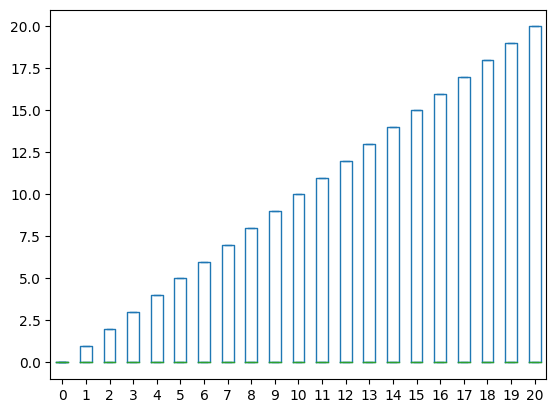

In [7]:
df = pd.DataFrame.from_dict(age_per_ind_per_gen)
df.plot.box()


<AxesSubplot: >

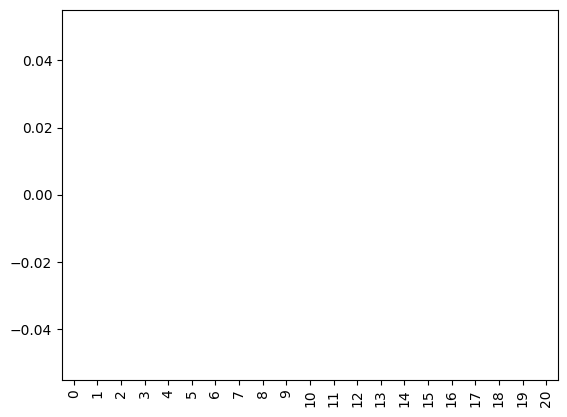

In [8]:
df.median().plot(kind='bar')